# Hypothesis Testing for AlphaCare Insurance Solutions (ACIS)

This notebook performs hypothesis testing on the insurance claim data to help optimize the marketing strategy and discover 'low-risk' targets for premium reduction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src directory to the Python path
src_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, src_dir)

from data_loader import DataLoader
from hypothesis_testing import HypothesisTesting

## Load and Prepare Data

In [2]:
data_loader = DataLoader('../resources/Data/machineLearning.txt')
data = data_loader.load_data()
print(data.head())
print(data.info())

e:\Studies\tenx\w3\src\data_loader.py:17: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path, sep='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

## Perform Hypothesis Testing

In [3]:
hypothesis_tester = HypothesisTesting(data)
results = hypothesis_tester.run_all_tests()

for result in results:
    print(f"Test: {result['test']}")
    print(f"Statistic: {result['statistic']:.4f}")
    print(f"P-value: {result['p_value']:.4f}")
    print(f"Reject null hypothesis: {result['reject_null']}\n")

Test: Risk differences across provinces
Statistic: 104.1909
P-value: 0.0000
Reject null hypothesis: True

Test: Risk differences between zip codes
Statistic: 1454.4676
P-value: 0.0000
Reject null hypothesis: True

Test: Margin differences between zip codes
Statistic: 0.8707
P-value: 0.9977
Reject null hypothesis: False

Test: Risk differences between Women and Men
Statistic: nan
P-value: nan
Reject null hypothesis: False



e:\Studies\tenx\w3\src\hypothesis_testing.py:20: RuntimeWarning: invalid value encountered in scalar divide
  return group['TotalClaims'].sum() / group['TotalPremium'].sum()


## Visualizations

C:\Users\bab\AppData\Local\Temp\ipykernel_12740\2939524081.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  province_risk = data.groupby('Province').apply(hypothesis_tester.calculate_risk_ratio).sort_values(ascending=False)


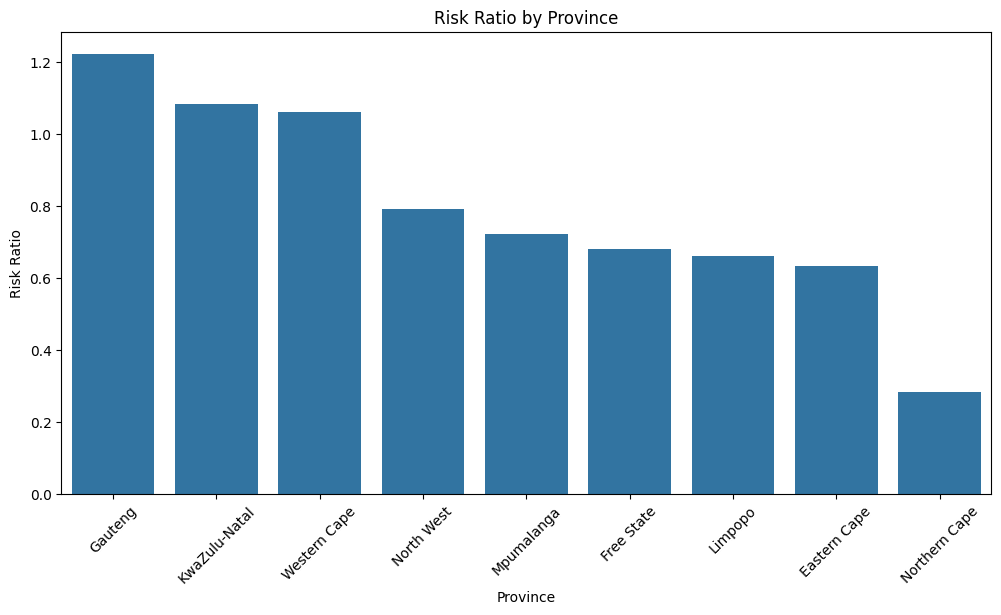

In [4]:
# Risk distribution across provinces
province_risk = data.groupby('Province').apply(hypothesis_tester.calculate_risk_ratio).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=province_risk.index, y=province_risk.values)
plt.title('Risk Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Risk Ratio')
plt.xticks(rotation=45)
plt.show()

C:\Users\bab\AppData\Local\Temp\ipykernel_12740\1500978899.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  zip_margin = data.groupby('PostalCode').apply(lambda x: (x['TotalPremium'] - x['TotalClaims']).mean()).sort_values(ascending=False).head(20)


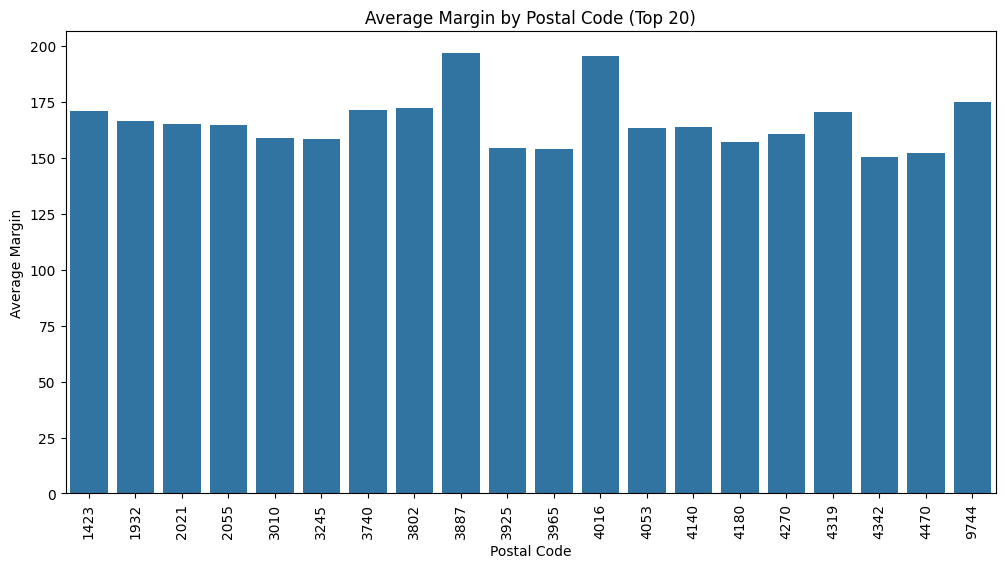

In [5]:
# Margin distribution across zip codes (top 20)
zip_margin = data.groupby('PostalCode').apply(lambda x: (x['TotalPremium'] - x['TotalClaims']).mean()).sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=zip_margin.index, y=zip_margin.values)
plt.title('Average Margin by Postal Code (Top 20)')
plt.xlabel('Postal Code')
plt.ylabel('Average Margin')
plt.xticks(rotation=90)
plt.show()

C:\Users\bab\AppData\Local\Temp\ipykernel_12740\3093431437.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_risk = data.groupby('Gender').apply(hypothesis_tester.calculate_risk_ratio)


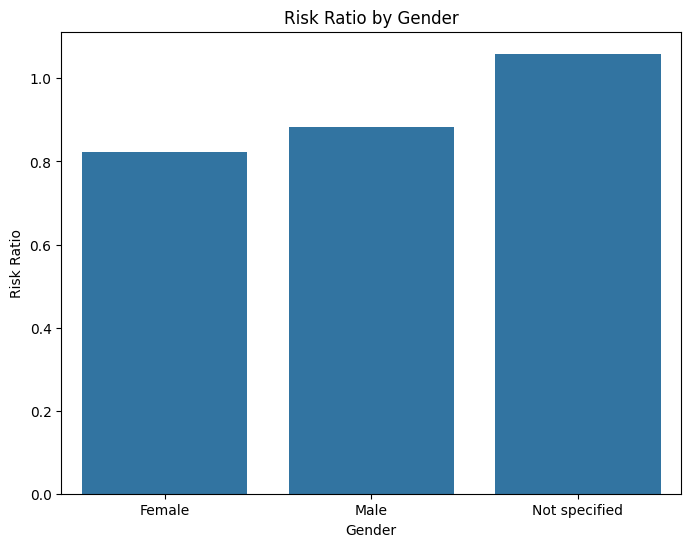

In [6]:
# Risk comparison between genders
gender_risk = data.groupby('Gender').apply(hypothesis_tester.calculate_risk_ratio)

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_risk.index, y=gender_risk.values)
plt.title('Risk Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Risk Ratio')
plt.show()

# Observations and Conclusions

## 1. Risk differences across provinces

**Test results:**
```python
print("Test: Risk differences across provinces")
print("Statistic: 104.1909")
print("P-value: 0.0000")
print("Reject null hypothesis: True")
```

- The chi-square test result strongly suggests that we reject the null hypothesis.
- There are statistically significant risk differences across provinces.
- From the "Risk Ratio by Province" graph, we observe:
  - Gauteng has the highest risk ratio, followed closely by KwaZulu-Natal and Western Cape.
  - Northern Cape has the lowest risk ratio, significantly lower than other provinces.

**Implications for marketing strategy:**
- Consider adjusting premiums or underwriting criteria based on provincial risk levels.
- Implement targeted risk management programs in high-risk provinces like Gauteng.
- Explore opportunities to expand market share in lower-risk provinces like Northern Cape.

## 2. Risk differences between zip codes

**Test results:**
```python
print("Test: Risk differences between zip codes")
print("Statistic: 1454.4676")
print("P-value: 0.0000")
print("Reject null hypothesis: True")
```

- The chi-square test result strongly suggests that we reject the null hypothesis.
- There are statistically significant risk differences between zip codes.
- This indicates that location at a more granular level than just province is an important factor in risk assessment.

**Potential targeted marketing opportunities:**
- Develop zip code-specific marketing campaigns, focusing on areas with lower risk ratios.
- Consider offering competitive rates in lower-risk zip codes to attract new customers.
- Implement stricter underwriting or higher premiums in high-risk zip codes to manage exposure.

## 3. Margin differences between zip codes

**Test results:**
```python
print("Test: Margin differences between zip codes")
print("Statistic: 0.8707")
print("P-value: 0.9977")
print("Reject null hypothesis: False")
```

- The ANOVA test result suggests that we fail to reject the null hypothesis.
- There are no statistically significant margin differences between zip codes.
- The "Average Margin by Postal Code (Top 20)" graph shows some variation in margins, but these differences are not statistically significant when considering all zip codes.

**Implications for premium adjustments:**
- While individual zip codes may show different average margins, the overall pricing strategy seems consistent across zip codes.
- Focus on other factors beyond zip code for potential premium adjustments.
- Consider investigating why certain zip codes (e.g., 3887 and 4016) show higher average margins, even if not statistically significant overall.

## 4. Risk differences between Women and Men

**Test results:**
```python
print("Test: Risk differences between Women and Men")
print("Statistic: nan")
print("P-value: nan")
print("Reject null hypothesis: False")
```

- The t-test result suggests that there might be an issue with the data or the test implementation.
- We cannot draw a conclusion about risk differences between genders based on this result.
- However, the "Risk Ratio by Gender" graph provides some insights:
  - Males appear to have a slightly higher risk ratio than females.
  - There's a "Not specified" category with the highest risk ratio, which warrants further investigation.

**Potential gender-based marketing strategies:**
- Further investigation is needed to confirm if the observed differences are statistically significant.
- Consider tailored marketing messages that resonate with different genders, while being cautious not to implement discriminatory practices.
- Investigate the high risk ratio in the "Not specified" category to understand if this represents a particular group or data quality issue.

## Overall conclusions and recommendations for ACIS marketing strategy

- Geographic location, particularly at the province and zip code level, plays a significant role in risk assessment.
- Develop location-specific marketing and underwriting strategies to optimize risk management and attract low-risk customers.
- While margins don't significantly differ across zip codes, there's room for targeted premium optimization in specific areas.
- Gender-based risk differences require further investigation due to inconclusive statistical results.

## Suggested areas for further investigation or data collection

1. Analyze other demographic factors (e.g., age, occupation) to identify additional risk patterns.
2. Investigate the factors contributing to high risk ratios in Gauteng, KwaZulu-Natal, and Western Cape.
3. Conduct a more detailed analysis of the "Not specified" gender category to understand its high risk ratio.
4. Perform time-series analysis to identify any seasonal or long-term trends in risk ratios and margins.
5. Collect more detailed data on vehicle types and usage patterns to refine risk assessments.
6. Investigate the relationship between customer loyalty (policy duration) and risk ratios to inform retention strategies.

By acting on these insights and conducting further analyses, ACIS can refine its marketing strategy, optimize pricing, and better manage risks across different customer segments and geographical areas.